# Exploring the Tree of Life dataset with Pandas

## First thing: import the pandas module.

In [1]:
import pandas as pd

You can find more information and tutorials on pandas here:

https://pandas.pydata.org/pandas-docs/stable/10min.html

https://pandas.pydata.org/pandas-docs/stable/tutorials.html

## Second: import the data.
We will play with a excerpt of the Tree of Life, that can be found together with this notebook. This dataset is reduced to the first 1000 taxons (starting from the root node). The full version is available here: [Open Tree of Life](https://tree.opentreeoflife.org/about/taxonomy-version/ott3.0).
![Public domain, https://en.wikipedia.org/wiki/File:Phylogenetic_tree.svg](imgTuto1/800px-Phylogenetic_tree.svg.png)
![Public Domain, https://commons.wikimedia.org/w/index.php?curid=3633804](imgTuto1/480px-Tree_of_life_SVG.svg.png)


In [2]:
ToL = pd.read_csv('taxonomysmall.tsv',sep='\t\|\t?', encoding='utf-8', engine='python')

If you do not remember the details of a function:

In [3]:
pd.read_csv?

For more info on the separator, see [regex](https://docs.python.org/3.6/library/re.html)

Now, what is the object `ToL`? it is a Pandas DataFrame!

In [4]:
ToL

,uid,parent_uid,name,rank,sourceinfo,uniqname,flags,Unnamed: 7
0,805080,NaN,life,no rank,"silva:0,ncbi:1,worms:1,gbif:0,irmng:0",NaN,NaN,NaN
1,93302,805080.0,cellular organisms,no rank,ncbi:131567,NaN,NaN,NaN
2,996421,93302.0,Archaea,domain,"silva:D37982/#1,ncbi:2157,worms:8,gbif:2,irmng:12",Archaea (domain silva:D37982/#1),NaN,NaN
3,5246114,996421.0,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal,silva:AB302039/#2,NaN,NaN,NaN
4,102415,996421.0,Thaumarchaeota,phylum,"silva:D87348/#2,ncbi:651137,worms:559429,irmng...",NaN,NaN,NaN
5,5246628,102415.0,terrestrial group,no rank - terminal,silva:AB600373/#3,NaN,NaN,NaN
6,4795965,102415.0,Marine Group I,no rank,"silva:D87348/#3,ncbi:905826",NaN,NaN,NaN
7,5205649,4795965.0,uncultured marine crenarchaeote 'Gulf of Maine',species,"silva:AGBE01001967,ncbi:1089683",NaN,sibling_higher,NaN
8,5208050,4795965.0,uncultured marine archaeon DCM858,species,"silva:AF121992,ncbi:105567",NaN,sibling_higher,NaN
9,5205092,4795965.0,uncultured marine group I thaumarchaeote,species,"silva:JF715361,ncbi:360837",NaN,sibling_higher,NaN


The description of the entries is given here:
https://github.com/OpenTreeOfLife/reference-taxonomy/wiki/Interim-taxonomy-file-format

## Let us explore the table

In [5]:
ToL.columns

Index(['uid', 'parent_uid', 'name', 'rank', 'sourceinfo', 'uniqname', 'flags',
       'Unnamed: 7'],
      dtype='object')

Let us drop some columns.

In [6]:
ToL = ToL.drop(columns= ['sourceinfo', 'uniqname', 'flags','Unnamed: 7'])

In [7]:
ToL.head()

,uid,parent_uid,name,rank
0,805080,NaN,life,no rank
1,93302,805080.0,cellular organisms,no rank
2,996421,93302.0,Archaea,domain
3,5246114,996421.0,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal
4,102415,996421.0,Thaumarchaeota,phylum


Pandas infered the type of values inside each column (int, float, string and string). The parent_uid column has float values because there was a missing value, converted to `NaN`

In [8]:
print(ToL['uid'].dtype, ToL.parent_uid.dtype)

int64 float64


How to access the individual values

In [9]:
ToL.iloc[0,2]

'life'

In [10]:
ToL.loc[0,'name']

'life'

Exercice: Guess the output if this line:

In [11]:
# ToL.uid[0] == ToL.parent_uid[1]

Ordering the data

In [12]:
ToL.sort_values(by='name').head()

,uid,parent_uid,name,rank
297,5246638,102415.0,AB64A-17,no rank - terminal
293,5246632,102415.0,AK31,no rank - terminal
298,5246637,102415.0,AK56,no rank - terminal
202,5246635,102415.0,AK59,no rank - terminal
204,5246636,102415.0,AK8,no rank - terminal


## Operation on the columns

Unique values, useful for categories:

In [13]:
ToL['rank'].unique()

array(['no rank', 'domain', 'no rank - terminal', 'phylum', 'species',
       'order', 'family', 'genus', 'class'], dtype=object)

In [15]:
#Selecting only one category
ToL[ToL['rank'] == 'species'].head()

,uid,parent_uid,name,rank
7,5205649,4795965.0,uncultured marine crenarchaeote 'Gulf of Maine',species
8,5208050,4795965.0,uncultured marine archaeon DCM858,species
9,5205092,4795965.0,uncultured marine group I thaumarchaeote,species
10,5205072,4795965.0,uncultured Nitrosopumilaceae archaeon,species
11,5208765,4795965.0,uncultured marine archaeon DCM874,species


How many species do we have?

In [16]:
len(ToL[ToL['rank'] == 'species'])

912

In [17]:
ToL['rank'].value_counts()

species               912
no rank - terminal     58
no rank                12
genus                   8
order                   3
family                  3
phylum                  1
domain                  1
class                   1
Name: rank, dtype: int64

# Building the graph

Let us build the adjacency matrix of the graph. For that we need to reorganize the data. First we separate the node and their properties from the edges.

In [18]:
ToLnodes = ToL[['uid','name','rank']]
ToLedges = ToL[['uid','parent_uid']]

When using an adjacency matrix, nodes are indexed by their row or column number and not by a `uid`. Let us create a new index for the nodes.

In [19]:
# Create a column for node index
ToLnodes.reset_index(level=0, inplace=True)
ToLnodes = ToLnodes.rename(columns={'index':'node_idx'})
ToLnodes.head()

,node_idx,uid,name,rank
0,0,805080,life,no rank
1,1,93302,cellular organisms,no rank
2,2,996421,Archaea,domain
3,3,5246114,Marine Hydrothermal Vent Group 1(MHVG-1),no rank - terminal
4,4,102415,Thaumarchaeota,phylum


In [20]:
# Create a convertion table from uid to node index
uid2idx = ToLnodes[['node_idx','uid']]
uid2idx = uid2idx.set_index('uid')
uid2idx.head()

,node_idx
uid,
805080,0
93302,1
996421,2
5246114,3
102415,4


In [21]:
ToLedges.head()

,uid,parent_uid
0,805080,NaN
1,93302,805080.0
2,996421,93302.0
3,5246114,996421.0
4,102415,996421.0


Now we are ready to use yet another powerful function of Pandas. Those familiar with SQL will recognize it: the `join` function.

In [22]:
# Add a new column, matching the uid with the node_idx
ToLedges = ToLedges.join(uid2idx,on='uid')

In [23]:
# Do the same with the parent_uid
ToLedges = ToLedges.join(uid2idx, on='parent_uid', rsuffix='_parent')

In [24]:
# Drop the uids
ToLedges = ToLedges.drop(columns=['uid','parent_uid'])

In [25]:
ToLedges.head()

,node_idx,node_idx_parent
0,0,NaN
1,1,0.0
2,2,1.0
3,3,2.0
4,4,2.0


This table is a list of edges connecting nodes and their parents.

##  The weight matrix

Let us use numpy to build this weight matrix.

In [26]:
import numpy as np
nb_nodes = len(ToLnodes)
W = np.zeros((nb_nodes,nb_nodes),dtype=int)

In [27]:
for idx,row in ToLedges.iterrows():
    if np.isnan(row.node_idx_parent):
        continue
    i,j=int(row.node_idx),int(row.node_idx_parent)
    W[i,j] = 1
    W[j,i] = 1

In [28]:
W[:15,:15]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

Congratulations, you have built the weight matrix!
To conclude, let us visualize the graph. We will use the python module `networkx`. Don't forget to run `pip install networkx` in the command line beforehand.

In [29]:
import networkx as nx

In [30]:
# A simple command to create the graph from the weight matrix
G = nx.from_numpy_array(W)

In addition, let us add some attributes to the nodes:

In [33]:
nodeprops = ToLnodes.to_dict()

In [34]:
for key in nodeprops:
    #print(key,nodeprops[key])
    nx.set_node_attributes(G,nodeprops[key],key)

Let us check if it is correctly recorded:

In [36]:
G.node[1]

{'node_idx': 1, 'uid': 93302, 'name': 'cellular organisms', 'rank': 'no rank'}

In [35]:
nx.write_gexf(G,'ToL.gexf')

In [38]:
import matplotlib.pyplot as plt

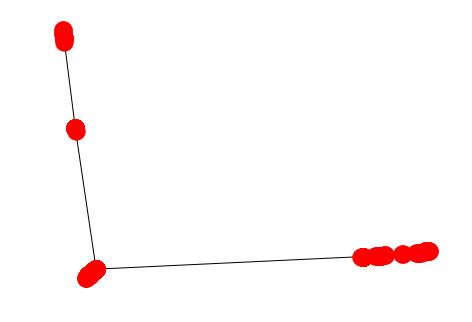

In [39]:
nx.draw_spectral(G)

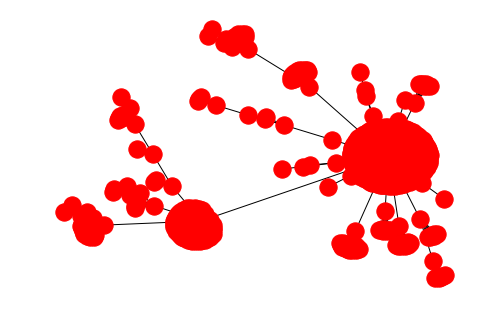

In [40]:
nx.draw_spring(G)

You may now explore the graph using Gephi and compare the visualizations.